In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import yfinance as yf
from datetime import date

# Data Preprocessing

In [2]:
# fetch the data
siemen = yf.Ticker("SIE.DE")
siemen

yfinance.Ticker object <SIE.DE>

In [3]:
#Get historical data
sie_data = siemen.history(start ="2015-01-01", end=date.today(), interval="1d")

sie_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-27,134.199997,135.860001,130.020004,130.020004,8044888,0.0,0
2021-05-28,133.100006,135.440002,133.100006,134.899994,1859774,0.0,0
2021-05-31,134.279999,134.679993,132.580002,132.639999,832411,0.0,0
2021-06-01,133.460007,136.419998,133.460007,135.039993,1274211,0.0,0
2021-06-02,134.720001,136.460007,134.419998,136.380005,1173747,0.0,0


### Data Visualization

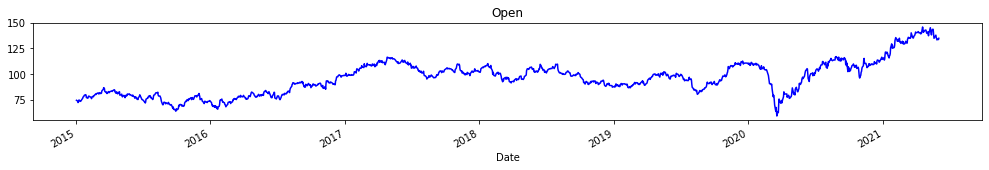

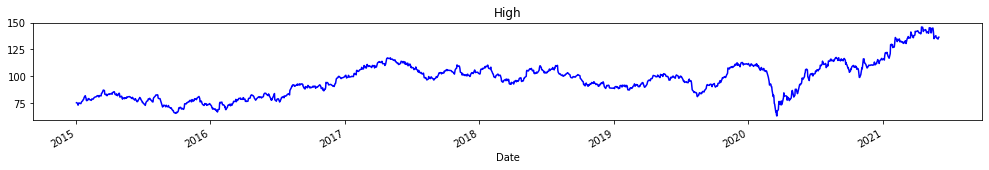

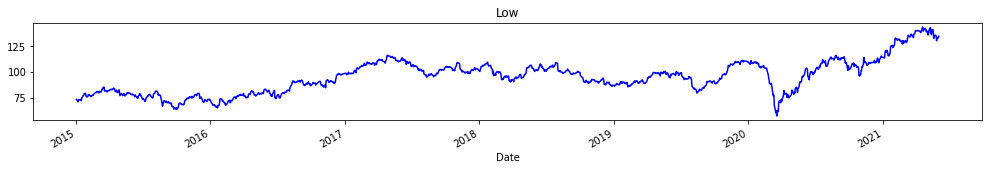

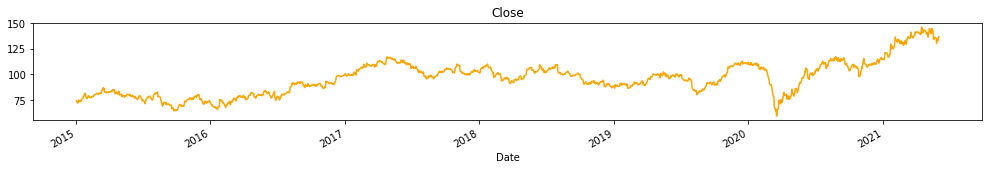

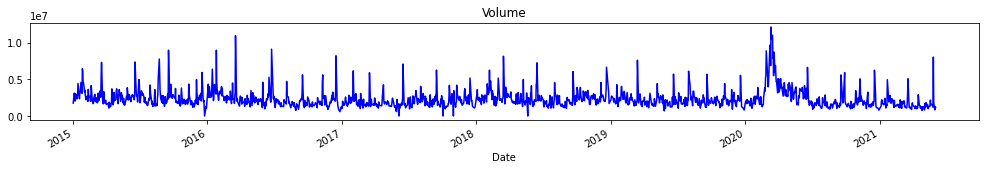

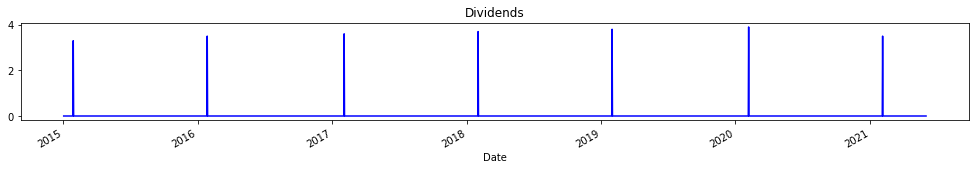

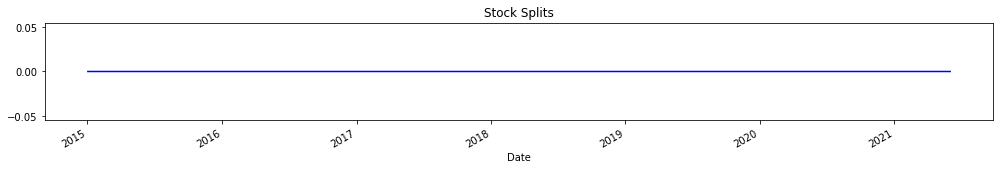

In [6]:
%matplotlib inline

for col in sie_data.columns:
    color="orange" if col == "Close" else "blue"
    sie_data[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()

In [7]:
# Reset the index, change Date to column
sie_data = sie_data.reset_index()
sie_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-01-02,74.446556,75.230536,73.385406,74.248581,1758856,0.0,0
1,2015-01-05,73.828881,74.779159,71.983751,72.007507,3126357,0.0,0
2,2015-01-06,72.308426,73.076571,70.978033,71.944153,2718101,0.0,0
3,2015-01-07,72.379694,73.116162,71.809525,72.403450,2032739,0.0,0
4,2015-01-08,73.567554,74.834594,73.092415,74.771240,3039053,0.0,0


In [8]:
#check if date is in datetime format
sie_data.Date.dtype

dtype('<M8[ns]')

### Changing the Column names
Facebook prophet takes only two features(columns). The column names must be ds: date, s:close. We are going to rename our columns.

In [10]:
#Extracting the date and close price columns
sie_df = sie_data[["Date", "Close"]]
sie_df.head()

,Date,Close
0,2015-01-02,74.248581
1,2015-01-05,72.007507
2,2015-01-06,71.944153
3,2015-01-07,72.403450
4,2015-01-08,74.771240


In [12]:
#rename the columns
sie_df = sie_df.rename(columns={'Date': 'ds', 'Close': 'y'})
sie_df.head()

,ds,y
0,2015-01-02,74.248581
1,2015-01-05,72.007507
2,2015-01-06,71.944153
3,2015-01-07,72.403450
4,2015-01-08,74.771240


### Splitting the Data

In [13]:
index = int(0.8 * sie_df.shape[0])
train_df = sie_df[:index]
test_df = sie_df[index:]

In [ ]:
len_ = int(0.8*df.shape[0])
df_train = df[:len_]
df_test = df[len_:]

In [15]:
print(train_df.shape)
print(test_df.shape)

(1300, 2)
(326, 2)


### Hyperparameter Tuning

In [24]:
cutoffs = pd.to_datetime(["2016-01-09", "2016-07-09", "2017-01-09"])

In [27]:
# import itertools
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.diagnostics import cross_validation
# from fbprophet.plot import plot_cross_validation_metric
# param_grid = {  
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# rmses = []  # Store the RMSEs for each params here

# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params).fit(train_df)  # Fit model with given params
#     df_cv = cross_validation(m, initial='730 days', period = '31 days', horizon = '365 days')
#     cutoffs = df_cv.groupby('cutoff').mean().reset_index()['cutoff']
#     cutoff = df_cv['cutoff'].unique()[0]
#     df_cv = df_cv[df_cv['cutoff'].values == cutoff]

#     rmses.append(df_p['rmse'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['rmse'] = rmses
# print(tuning_results)

## Fitting the Model

In [33]:
model = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True,yearly_seasonality=True, interval_width = 0.95)
model.add_seasonality('self_define_cycle',period=8,fourier_order=8,mode='additive')
model.fit(train_df)

## Make Future Prediction
👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [36]:
horizon = 36
future = model.make_future_dataframe(periods =horizon, freq="M")
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1331,2022-09-30,159.453179,-373.073385,698.825124
1332,2022-10-31,165.615953,-391.110358,730.758035
1333,2022-11-30,171.443128,-399.351058,763.742891
1334,2022-12-31,173.636078,-436.747519,802.753935
1335,2023-01-31,177.178599,-479.068098,834.939800


## Plotting the Forecast

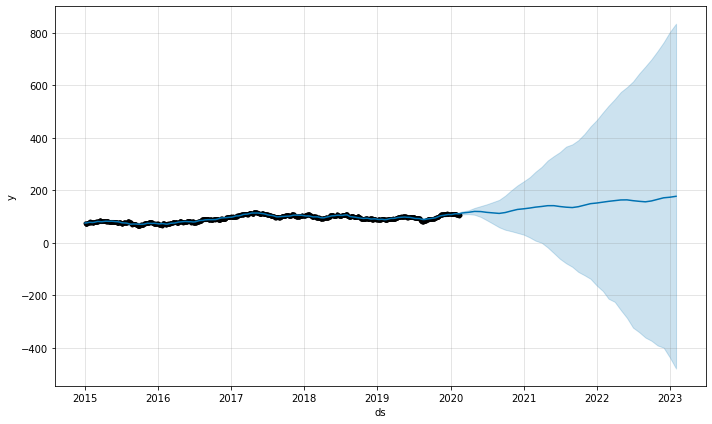

In [37]:
ax = model.plot(forecast);

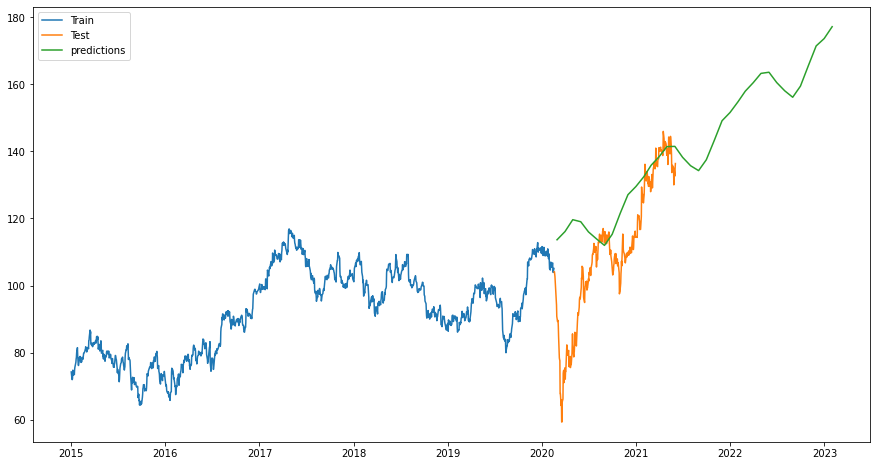

In [38]:
#Plotting the train, test and forecast for comparison
plt.figure(figsize=(15, 8))
plt.plot(train_df['ds'], train_df['y'], label="Train")
plt.plot(test_df['ds'], test_df['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

The Train data is from 2015-the beginning of 2020, while the test data is from the beginning of 2020 to middle of 2021 and our forecasted data started predicting from 2020 to 2023

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

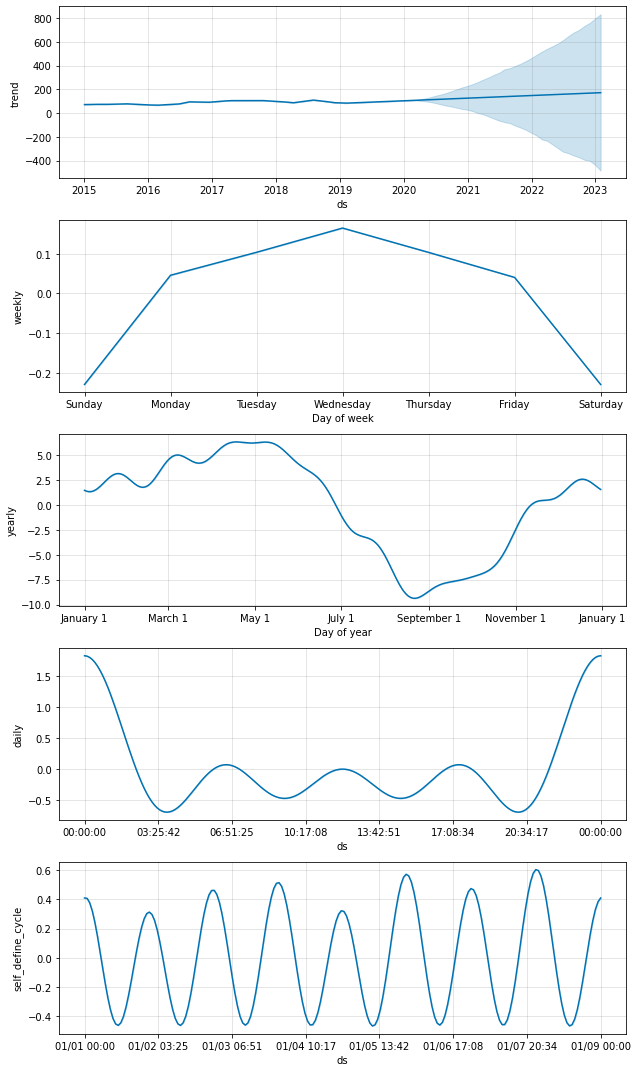

In [39]:
model.plot_components(forecast);

## Evaluating the model with cross-validation!
👇 Using cross_validation() and performance_metrics() from fbprophet.diagnostics, evaluate the performance of your model

More precisely, create a Time Series K-fold CV with

* train sets of size 5 years
* horizon val sizes of 1 years
* shifting each fold by 180 days


In [41]:
# Your code here
cv_results = cross_validation(model=model, initial=f'{365 * 3} days', horizon='365 days', period='180 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2018-02-22 00:00:00 and 2019-02-17 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [43]:
cv_results.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
749,2020-02-11,90.526485,-89.946833,262.816360,106.623528,2019-02-17
750,2020-02-12,90.580505,-91.148465,263.963668,106.759926,2019-02-17
751,2020-02-13,90.684653,-92.265889,265.495752,104.402206,2019-02-17
752,2020-02-14,90.677219,-90.800579,265.115429,103.915077,2019-02-17
753,2020-02-17,90.788015,-95.629260,268.325403,105.103668,2019-02-17


In [45]:
#performance metrics
df_p = performance_metrics(cv_results)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days,24.605204,4.960363,3.990675,0.041940,0.036520,0.68
1,36 days,24.787397,4.978694,4.013841,0.042226,0.036667,0.68
2,37 days,25.009123,5.000912,4.045359,0.042595,0.037547,0.68
3,38 days,25.269241,5.026852,4.096730,0.043153,0.038031,0.68
4,39 days,25.543826,5.054090,4.144062,0.043693,0.038298,0.68


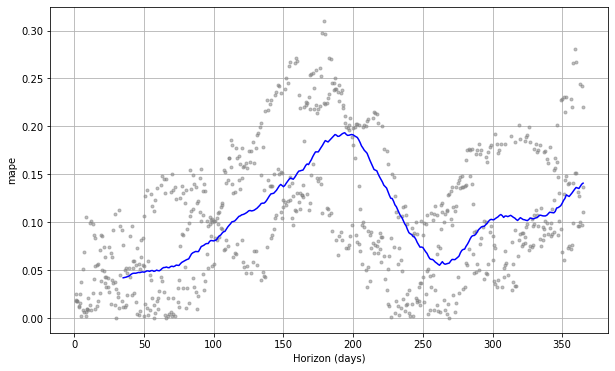

In [46]:
plot_cross_validation_metric(cv_results, metric='mape');